In [1]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

In [2]:
# https://archive.ics.uci.edu/static/public/53/iris.zip
cols = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df = pd.read_csv("../artifacts/iris.data", sep=",", header=None, names=cols)

In [3]:
# after downloading the dataset using the above link uncomment the below lines to correct the changes in dataset "refer the iris.names for more details"

df.iloc[34, 3] = 0.2
df.iloc[37, 1] = 3.6
df.iloc[37, 2] = 1.4

# after changing the details save the dataframe to csv using the below line
df.to_csv("../artifacts/final.csv", index=False)

In [4]:
df = pd.read_csv("../artifacts/final.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,class
97,6.2,2.9,4.3,1.3,Iris-versicolor
16,5.4,3.9,1.3,0.4,Iris-setosa
65,6.7,3.1,4.4,1.4,Iris-versicolor
79,5.7,2.6,3.5,1.0,Iris-versicolor
68,6.2,2.2,4.5,1.5,Iris-versicolor


In [6]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 15.1 KB


In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


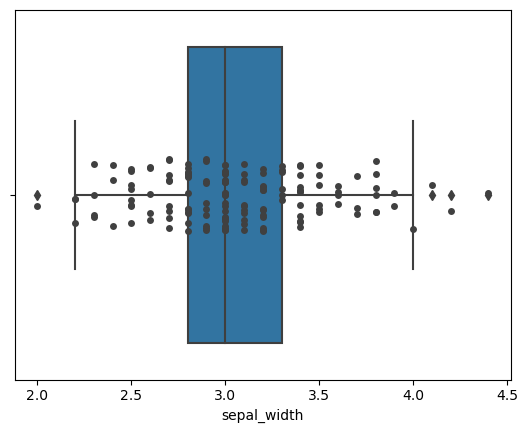

In [8]:
sns.boxplot(x=df["sepal_width"])
sns.stripplot(x=df["sepal_width"], color=".25")
plt.show()

C:\Users\rakes\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


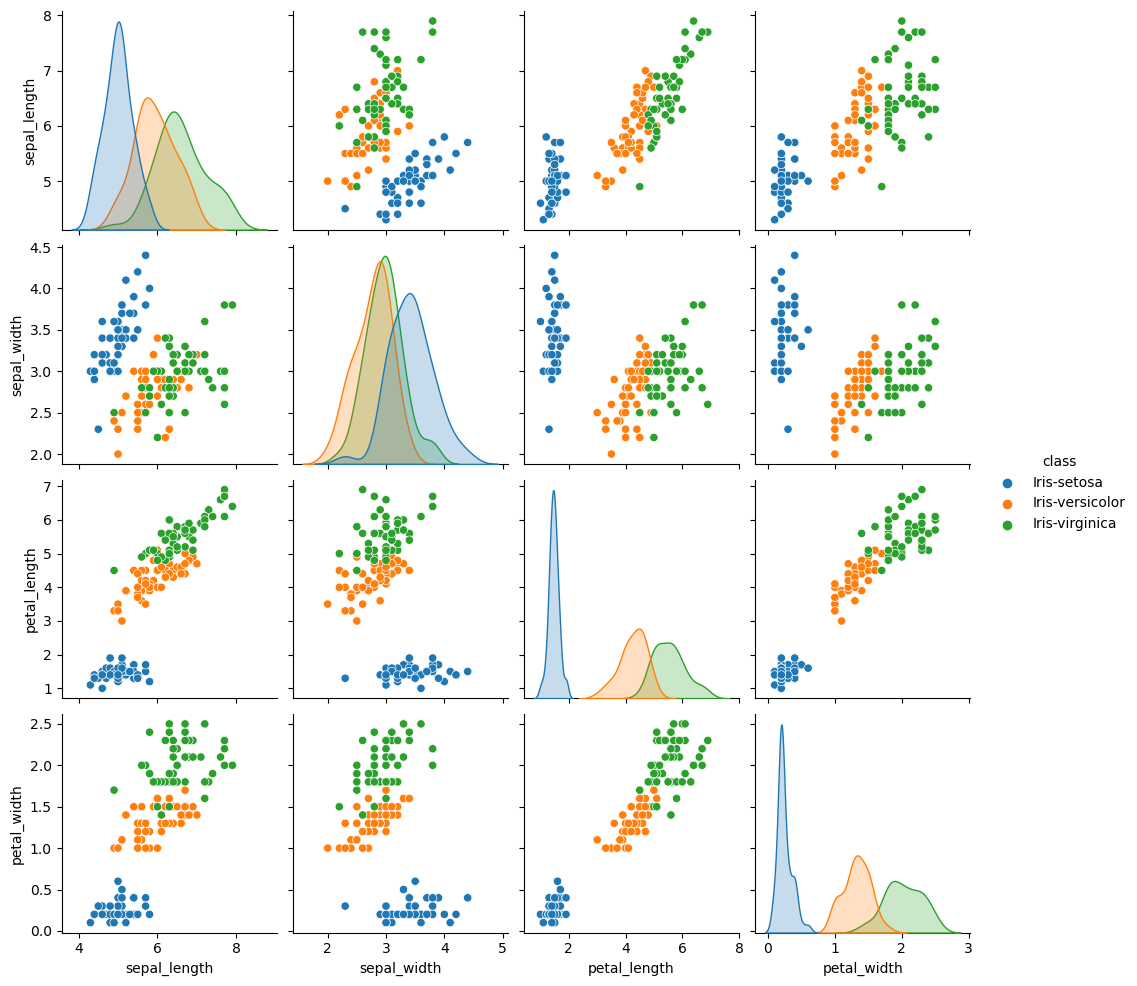

In [9]:
sns.pairplot(df, hue="class")
plt.show()

In [10]:
X = df.iloc[:, :-1]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
y = df.iloc[:, -1]
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object

In [12]:
X_train, y_train, X_test, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [13]:
print(
    "Training features size: {}\nTraining target size: \t{}\n\nTesting features size: \t{}\nTesting target size: \t{}".format(
        X_train.shape, X_test.shape, y_train.shape, y_test.shape
    )
)

Training features size: (120, 4)
Training target size: 	(120,)

Testing features size: 	(30, 4)
Testing target size: 	(30,)


In [14]:
lr = LogisticRegression(max_iter=5000)

In [16]:
def save_object(file_path):
    with open(file_path, "wb") as model:
        pickle.dump(lr, model)

In [17]:
lr.fit(X_train, X_test)
save_object("../artifacts/logisticRegression.pkl")

In [18]:
def load_object(file_path):
    try:
        with open(file_path, "rb") as file_obj:
            return pickle.load(file_obj)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return None
    except Exception as e:
        print(f"An error occurred while loading the object: {e}")
        return None

In [19]:
logReg = load_object("../artifacts/logisticRegression.pkl")

In [20]:
len(logReg.predict(y_train))

30

In [25]:
len(lr.predict(y_train))

30

In [27]:
rf = RandomForestClassifier()

In [28]:
rf.fit(X_train, X_test)

RandomForestClassifier()

In [29]:
rf_y = rf.predict(y_train)

In [ ]:
accuracy_score(y_test, rf_y)

In [ ]:
df = pd.DataFrame(
    {
        "sepal_length": float(request.form.get("sepal_length")),
        "sepal_width": float(request.form.get("sepal_width")),
        "petal_length": float(request.form.get("petal_length")),
        "petal_widlth": float(request.form.get("petal_widlth")),
    },
    index=[0],
)
df